In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


In [3]:
data.Sex.unique()

array(['M', 'F'], dtype=object)

In [4]:
data.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [5]:
data.FastingBS.unique()

array([0, 1], dtype=int64)

In [6]:
data.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [7]:
data.Oldpeak.unique()

array([ 0. ,  1. ,  1.5,  2. ,  3. ,  4. ,  0.5,  2.5,  5. ,  0.8,  0.7,
        1.4,  2.1,  0.4,  0.2,  1.7,  2.2,  0.1,  1.6,  1.3,  0.3,  1.8,
        2.6, -0.9,  2.8, -2.6, -1.5, -0.1,  0.9,  1.1,  2.4, -1. , -1.1,
       -0.7, -0.8,  3.7,  1.2, -0.5, -2. ,  1.9,  3.5,  0.6,  3.1,  2.3,
        3.4,  3.6,  4.2,  3.2,  5.6,  3.8,  2.9,  6.2,  4.4])

In [8]:
data.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [9]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [11]:
#sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.00,53.51,9.43,28.00,47.00,54.00,60.00,77.00
RestingBP,918.00,132.40,18.51,0.00,120.00,130.00,140.00,200.00
Cholesterol,918.00,198.80,109.38,0.00,173.25,223.00,267.00,603.00
FastingBS,918.00,0.23,0.42,0.00,0.00,0.00,0.00,1.00
MaxHR,918.00,136.81,25.46,60.00,120.00,138.00,156.00,202.00
Oldpeak,918.00,0.89,1.07,-2.60,0.00,0.60,1.50,6.20
HeartDisease,918.00,0.55,0.50,0.00,0.00,1.00,1.00,1.00


In [13]:
col = list(data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = data.copy(deep = True)

df1['Sex'] = le.fit_transform(df1['Sex'])
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina'] = le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])

In [15]:
df1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.00,2,0
1,49,0,2,160,180,0,1,156,0,1.00,1,1
2,37,1,1,130,283,0,2,98,0,0.00,2,0
3,48,0,0,138,214,0,1,108,1,1.50,1,1
4,54,1,2,150,195,0,1,122,0,0.00,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.20,1,1
914,68,1,0,144,193,1,1,141,0,3.40,1,1
915,57,1,0,130,131,0,1,115,1,1.20,1,1
916,57,0,1,130,236,0,0,174,0,0.00,1,1


In [16]:
x = df1.drop(['HeartDisease'],axis=1)
x

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.00,2
1,49,0,2,160,180,0,1,156,0,1.00,1
2,37,1,1,130,283,0,2,98,0,0.00,2
3,48,0,0,138,214,0,1,108,1,1.50,1
4,54,1,2,150,195,0,1,122,0,0.00,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.20,1
914,68,1,0,144,193,1,1,141,0,3.40,1
915,57,1,0,130,131,0,1,115,1,1.20,1
916,57,0,1,130,236,0,0,174,0,0.00,1


In [17]:
y = df1[['HeartDisease']]

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.3,random_state=1)

In [20]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.7536231884057971

In [22]:
from sklearn.metrics import classification_report
print(classification_report(ytest,model.predict(xtest)))

              precision    recall  f1-score   support

           0       0.65      0.83      0.73       109
           1       0.86      0.71      0.78       167

    accuracy                           0.75       276
   macro avg       0.75      0.77      0.75       276
weighted avg       0.78      0.75      0.76       276



In [74]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [76]:
precision = precision_score(ytest, model.predict(xtest))
recall = recall_score(ytest, model.predict(xtest))
f1score= f1_score(ytest,model.predict(xtest))

In [28]:
recall

0.7065868263473054

In [29]:
f1_score

0.7763157894736842

In [30]:
precision

0.8613138686131386

In [63]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [64]:
model = GaussianNB()
model.fit(xtrain, ytrain)
accuracy = accuracy_score(ytest, model.predict(xtest))

In [65]:
accuracy

0.8405797101449275

In [78]:
precision = precision_score(ytest, model.predict(xtest))
recall = recall_score(ytest, model.predict(xtest))
f1 = f1_score(ytest, model.predict(xtest))
print(precision,recall,f1)

0.9019607843137255 0.8263473053892215 0.8624999999999999


In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
modelx = RandomForestClassifier()
modelx.fit(xtrain,ytrain)
modelx.score(xtest,ytest)

0.8876811594202898

In [34]:
precision = precision_score(ytest, modelx.predict(xtest))
recall = recall_score(ytest, modelx.predict(xtest))
print(precision,recall)

0.9197530864197531 0.8922155688622755


In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
confusion_matrix(ytest,modelx.predict(xtest))
print(classification_report(ytest,modelx.predict(xtest)))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       109
           1       0.92      0.89      0.91       167

    accuracy                           0.89       276
   macro avg       0.88      0.89      0.88       276
weighted avg       0.89      0.89      0.89       276



In [49]:
from sklearn.metrics import classification_report
print(classification_report(ytest,modelx.predict(xtest)))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       109
           1       0.92      0.89      0.91       167

    accuracy                           0.89       276
   macro avg       0.88      0.89      0.88       276
weighted avg       0.89      0.89      0.89       276



In [50]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)

In [51]:
model.fit(xtrain,ytrain)

KNeighborsClassifier()

In [52]:
model.score(xtest,ytest)

0.7282608695652174

In [55]:
precision = precision_score(ytest, model.predict(xtest))
recall = recall_score(ytest, model.predict(xtest))
#f1_scorex = f1_score(ytest,modelx.predict(xtest))
print(precision,recall)
#print(classification_report(ytest,model.predict(xtest)))

0.7911392405063291 0.7485029940119761


In [24]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [25]:
fpr ,tpr , threshold = roc_curve(ytest,model.predict_proba(xtest)[:,1])

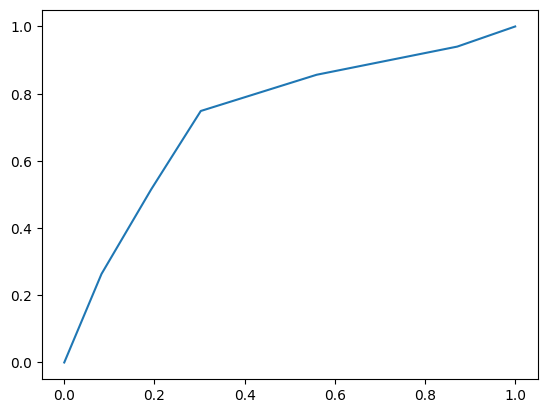

In [26]:
plt.plot(fpr,tpr)

In [27]:
roc_auc_score(ytest,model.predict_proba(xtest)[:,1])

0.7341646981266823

In [56]:
from sklearn.linear_model import LogisticRegression

In [58]:
model = LogisticRegression()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.8586956521739131

In [59]:
precision = precision_score(ytest, model.predict(xtest))
recall = recall_score(ytest, model.predict(xtest))
#f1_scorex = f1_score(ytest,modelx.predict(xtest))
print(precision,recall)
#print(classification_report(ytest,model.predict(xtest)))

0.9155844155844156 0.844311377245509


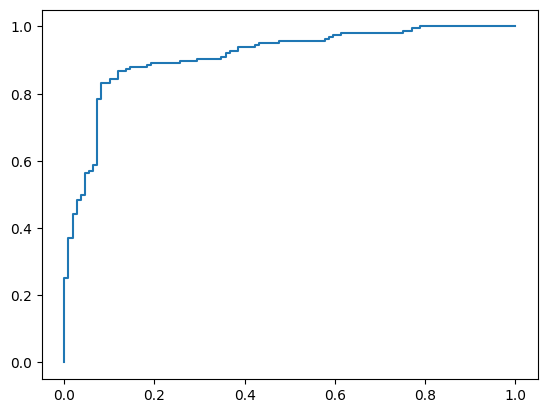

In [30]:
fpr ,tpr , threshold = roc_curve(ytest,model.predict_proba(xtest)[:,1])
plt.plot(fpr,tpr)

In [31]:
roc_auc_score(ytest,model.predict_proba(xtest)[:,1])

0.9124869527001044

In [32]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy

In [33]:
# Define the architecture of the neural network
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(11,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [34]:
# Train the model
model.fit(xtrain, ytrain, epochs=100, batch_size=32)

Epoch 1/100
21/21 [==============================] - 1s 2ms/step - loss: 4.4871 - accuracy: 0.5078
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.9537 - accuracy: 0.6433
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6632 - accuracy: 0.6947
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5918 - accuracy: 0.7087
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.8704 - accuracy: 0.6667
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.8495 - accuracy: 0.6636
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.7093 - accuracy: 0.6807
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5570 - accuracy: 0.7461
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5291 - accuracy: 0.7523
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5278 - accuracy: 0.7601
Epoch 11/

21/21 [==============================] - 0s 2ms/step - loss: 0.5598 - accuracy: 0.7586
Epoch 84/100
21/21 [==============================] - 0s 1ms/step - loss: 0.3832 - accuracy: 0.8411
Epoch 85/100
21/21 [==============================] - 0s 1ms/step - loss: 0.4347 - accuracy: 0.8084
Epoch 86/100
21/21 [==============================] - 0s 1ms/step - loss: 0.5889 - accuracy: 0.7788
Epoch 87/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3851 - accuracy: 0.8333
Epoch 88/100
21/21 [==============================] - 0s 1ms/step - loss: 0.5291 - accuracy: 0.7555
Epoch 89/100
21/21 [==============================] - 0s 1ms/step - loss: 0.3785 - accuracy: 0.8349
Epoch 90/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4226 - accuracy: 0.8084
Epoch 91/100
21/21 [==============================] - 0s 1ms/step - loss: 0.3730 - accuracy: 0.8427
Epoch 92/100
21/21 [==============================] - 0s 1ms/step - loss: 0.3708 - accuracy: 0.8536
Epoch 93/100


In [35]:
# Evaluate the model
test_loss, test_acc = model.evaluate(xtest, ytest)
print('Test accuracy:', test_acc)

# Make predictions
predictions = model.predict(xtest)
#predictions

9/9 [==============================] - 0s 2ms/step - loss: 0.5217 - accuracy: 0.8188
Test accuracy: 0.8188405632972717
9/9 [==============================] - 0s 1ms/step


In [36]:
# TFLite

from tensorflow import lite
converter = lite.TFLiteConverter.from_keras_model(model)

tfmodel = converter.convert()

open('Heart_Failure_TF.tflite','wb').write(tfmodel)

INFO:tensorflow:Assets written to: C:\Users\nssho\AppData\Local\Temp\tmp1a7c8rl8\assets


INFO:tensorflow:Assets written to: C:\Users\nssho\AppData\Local\Temp\tmp1a7c8rl8\assets


22032

In [37]:
x

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.00,2
1,49,0,2,160,180,0,1,156,0,1.00,1
2,37,1,1,130,283,0,2,98,0,0.00,2
3,48,0,0,138,214,0,1,108,1,1.50,1
4,54,1,2,150,195,0,1,122,0,0.00,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.20,1
914,68,1,0,144,193,1,1,141,0,3.40,1
915,57,1,0,130,131,0,1,115,1,1.20,1
916,57,0,1,130,236,0,0,174,0,0.00,1


In [38]:
y

,HeartDisease
0,0
1,1
2,0
3,1
4,0
...,...
913,1
914,1
915,1
916,1


In [56]:
data.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.00,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.00,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.00,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.50,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.00,Up,0


In [57]:
x.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.00,2
1,49,0,2,160,180,0,1,156,0,1.00,1
2,37,1,1,130,283,0,2,98,0,0.00,2
3,48,0,0,138,214,0,1,108,1,1.50,1
4,54,1,2,150,195,0,1,122,0,0.00,2
5,39,1,2,120,339,0,1,170,0,0.00,2
6,45,0,1,130,237,0,1,170,0,0.00,2
7,54,1,1,110,208,0,1,142,0,0.00,2
8,37,1,0,140,207,0,1,130,1,1.50,1
9,48,0,1,120,284,0,1,120,0,0.00,2


In [54]:
data.RestingBP.mean()

132.39651416122004

In [60]:
data.Cholesterol.max()

603

In [62]:
data.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [63]:
x1 = x.drop(['Oldpeak','ST_Slope'],axis=1)

In [64]:
y1 = y

In [65]:
xtrain,xtest,ytrain,ytest = train_test_split(x1,y1,test_size=.3,random_state=1)

In [68]:
# Define the architecture of the neural network
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(9,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [69]:
# Train the model
model.fit(xtrain, ytrain, epochs=100, batch_size=32)

Epoch 1/100
21/21 [==============================] - 1s 1ms/step - loss: 1.2704 - accuracy: 0.5872
Epoch 2/100
21/21 [==============================] - 0s 1ms/step - loss: 0.7937 - accuracy: 0.6589
Epoch 3/100
21/21 [==============================] - 0s 1ms/step - loss: 0.8348 - accuracy: 0.6526
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6018 - accuracy: 0.7196
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6469 - accuracy: 0.7134
Epoch 6/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6033 - accuracy: 0.6931
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.7606 - accuracy: 0.6667
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.7002 - accuracy: 0.6854
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5534 - accuracy: 0.7492
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5261 - accuracy: 0.7477
Epoch 11/

21/21 [==============================] - 0s 1ms/step - loss: 0.4399 - accuracy: 0.8162
Epoch 84/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5020 - accuracy: 0.7773
Epoch 85/100
21/21 [==============================] - 0s 1ms/step - loss: 0.8294 - accuracy: 0.6713
Epoch 86/100
21/21 [==============================] - 0s 1ms/step - loss: 0.4942 - accuracy: 0.7632
Epoch 87/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4561 - accuracy: 0.8069
Epoch 88/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4665 - accuracy: 0.7928
Epoch 89/100
21/21 [==============================] - 0s 1ms/step - loss: 0.5170 - accuracy: 0.7695
Epoch 90/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6587 - accuracy: 0.7040
Epoch 91/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5250 - accuracy: 0.7773
Epoch 92/100
21/21 [==============================] - 0s 1ms/step - loss: 0.4595 - accuracy: 0.7975
Epoch 93/100


In [70]:
# Evaluate the model
test_loss, test_acc = model.evaluate(xtest, ytest)
print('Test accuracy:', test_acc)

# Make predictions
predictions = model.predict(xtest)
#predictions

9/9 [==============================] - 0s 2ms/step - loss: 0.6286 - accuracy: 0.7971
Test accuracy: 0.7971014380455017
9/9 [==============================] - 0s 1ms/step


In [79]:
# TFLite

from tensorflow import lite
converter = lite.TFLiteConverter.from_keras_model(model)

tfmodel = converter.convert()

open('Heart_Failure_TF.tflite','wb').write(tfmodel)

INFO:tensorflow:Assets written to: C:\Users\nssho\AppData\Local\Temp\tmp1389iwpl\assets


INFO:tensorflow:Assets written to: C:\Users\nssho\AppData\Local\Temp\tmp1389iwpl\assets


21552

In [72]:
x1.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina
0,40,1,1,140,289,0,1,172,0
1,49,0,2,160,180,0,1,156,0
2,37,1,1,130,283,0,2,98,0
3,48,0,0,138,214,0,1,108,1
4,54,1,2,150,195,0,1,122,0
5,39,1,2,120,339,0,1,170,0
6,45,0,1,130,237,0,1,170,0
7,54,1,1,110,208,0,1,142,0
8,37,1,0,140,207,0,1,130,1
9,48,0,1,120,284,0,1,120,0


In [78]:
model.predict([[48,0,0,138,214,0,1,108,1]])

1/1 [==============================] - 0s 39ms/step


array([[0.94053674]], dtype=float32)

In [73]:
data.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.00,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.00,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.00,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.50,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.00,Up,0
